In [63]:
from reactionSmarts import REACTANT1_DICT, REACTANT2_DICT, reaction_smarts
from chemUtils.substructure import find_attachmentIdxs_fromMolAndSubstruct
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs import FingerprintSimilarity
import pandas as pd
import datetime
import os

In [7]:
reactants = [('Nc1cccc2[nH]ccc12', 'CC(C)(C)OC(=O)NC1(CCC(=O)O)CCCC1'), ('CC(C)(C)OC(=O)NC1(CCC(=O)Nc2cccc3[nH]ccc23)CCCC1',)]
rxn_smarts = '[#6:1](=[#8:2])-[#8;H1].[#7&X3;!$(NC=*);!$(NS):3]>>[#6:1](=[#8:2])-[#7X3:3]'
reaction = AllChem.ReactionFromSmarts(rxn_smarts)


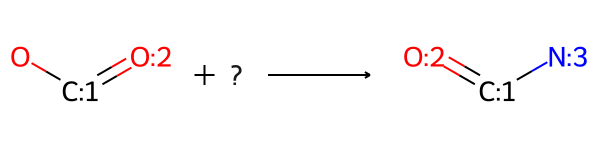

In [8]:
reaction

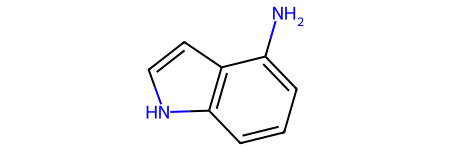

In [14]:
reactant1 = Chem.MolFromSmiles(reactants[0][0])
reactant2 = Chem.MolFromSmiles(reactants[0][1])
reactant1

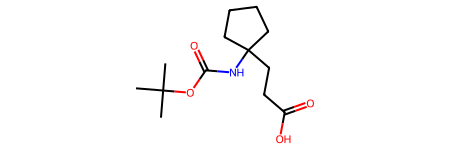

In [15]:
reactant2 

In [22]:
prods = reaction.RunReactants((reactant2, reactant1))

In [23]:
reaction.RunReactants((reactant1, reactant2))

()

In [38]:
prod = reactants[1][0]
prod = Chem.MolFromSmiles(prod)
Chem.SanitizeMol(prod)


rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

In [39]:
Chem.SanitizeMol(prods[0][0])

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

In [40]:
Chem.SanitizeMol(prods[1][0])

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

In [44]:
# Find tanimoto similarity
# Calculate fingerprints (using Morgan Fingerprints as an example)
real_prod = AllChem.GetMorganFingerprintAsBitVect(prod, radius=2, nBits=1024)
pred_prod1 = AllChem.GetMorganFingerprintAsBitVect(prods[0][0], radius=2, nBits=1024)
pred_prod2 = AllChem.GetMorganFingerprintAsBitVect(prods[1][0], radius=2, nBits=1024)

# Calculate Tanimoto similarity
sim1 = FingerprintSimilarity(real_prod, pred_prod1)
sim2 = FingerprintSimilarity(real_prod, pred_prod2)

In [45]:
sim1

1.0

In [46]:
sim2

0.5072463768115942

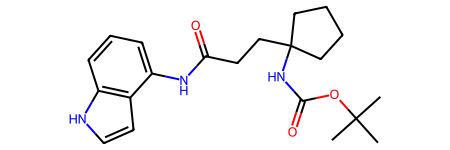

In [48]:
prods[0][0]

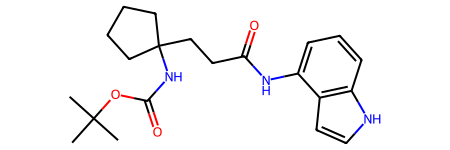

In [49]:
prod

In [50]:
pred_prods = {}
pred_prods['r1_r2'] = [Chem.SanitizeMol(x[0]) for x in reaction.RunReactants((reactant1, reactant2)) if x is not None]
pred_prods['r2_r1'] = [Chem.SanitizeMol(x[0]) for x in reaction.RunReactants((reactant2, reactant1)) if x is not None]

In [51]:
pred_prods['r1_r2']

[]

In [52]:
pred_prods['r2_r1']

[rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE,
 rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE]

In [53]:
pred_prods['r2_r1'][0]

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

In [67]:
# Change index of csv
df = pd.read_csv('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/routes_data/D68EV3CPROA_enumeration_oct10_first_route_2_step_FORWARD_1st_step.csv')
df

,Unnamed: 0,smiles,num_steps,reactants,rxn_order_first_to_last,dir_name
0,0,Cc1cc2c(cc1NC(=O)NCCB1OC(C)(C)C(C)(C)O1)OCO2,1,"[('Cc1cc2c(cc1N)OCO2', 'CC1(C)OB(CCN)OC1(C)C')]",['Formation of urea from two amines'],['ENAMINE:Z1637917899_x1140_0A_x1594_0A']
1,5,CC(C)(C)OC(=O)c1ccc2c(c1)OCO2,1,"[('O=C(O)c1ccc2c(c1)OCO2', 'CC(C)(C)O')]",['Steglich esterification'],['MOLPORT:004-137-806_x1140_0A_x1594_0A']
2,6,O=S(=O)(CCC1CC1)N(Cc1ccccc1)Cc1nnc2ccccn12,1,"[('c1ccc(CNCc2nnc3ccccn23)cc1', 'O=S(=O)(Cl)CC...",['Sulfonamide Schotten-Baumann with amine (int...,['ENAMINE:Z1530202140_x1140_0A_x1594_0A']
3,11,CCOP(=O)(CC(=O)NCCc1nnc2ccccn12)OCC,1,"[('NCCc1nnc2ccccn12', 'CCOP(=O)(CC(=O)O)OCC')]",['Amidation'],"['MOLPORT:002-662-833_x1594_0A_x1140_0A', 'MOL..."
4,17,CC(Sc1nnc2ccc(C(F)(F)F)cn12)C(=O)O,1,"[('FC(F)(F)c1ccc2nnc(S)n2c1', 'CC(Cl)C(=O)O')]",['Nucleophilic substitution with thiol'],"['MOLPORT:009-461-148_x1594_0A_x1140_0A', 'MOL..."
...,...,...,...,...,...,...
307,598,COC(=O)N(CC(=O)N1CCC(CCNC(=O)C2CCC2)CC1)Cc1ccccc1,1,"[('O=C(NCCC1CCNCC1)C1CCC1', 'COC(=O)N(CC(=O)O)...",['Amidation'],['ENAMINE:PV-001542212566_x1071_0A_x1083_0A']
308,599,CCC(NC(=O)OC(C)(C)C)C(=O)N1CCC(N)CC1,1,"[('NC1CCNCC1', 'CCC(NC(=O)OC(C)(C)C)C(=O)OC')]",['Ester amidation'],['MOLPORT:029-923-160_x1071_0A_x1083_0A']
309,600,CC(C)C(C)C(=O)Nc1cnn(CCN2C(=O)c3ccccc3C2=O)c1,1,"[('Nc1cnn(CCN2C(=O)c3ccccc3C2=O)c1', 'COC(=O)C...",['Ester amidation'],['ENAMINE:Z3700590637_x1020_0A_x0130_0A']
310,602,COC(=O)N(CC(=O)N1C2CCC1(CNC(=O)C1CCC1)CC2)Cc1c...,1,"[('O=C(NCC12CCC(CC1)N2)C1CCC1', 'COC(=O)N(CC(=...",['Amidation'],['ENAMINE:PV-003639724768_x1071_0A_x1083_0A']


In [68]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,smiles,num_steps,reactants,rxn_order_first_to_last,dir_name
0,Cc1cc2c(cc1NC(=O)NCCB1OC(C)(C)C(C)(C)O1)OCO2,1,"[('Cc1cc2c(cc1N)OCO2', 'CC1(C)OB(CCN)OC1(C)C')]",['Formation of urea from two amines'],['ENAMINE:Z1637917899_x1140_0A_x1594_0A']
1,CC(C)(C)OC(=O)c1ccc2c(c1)OCO2,1,"[('O=C(O)c1ccc2c(c1)OCO2', 'CC(C)(C)O')]",['Steglich esterification'],['MOLPORT:004-137-806_x1140_0A_x1594_0A']
2,O=S(=O)(CCC1CC1)N(Cc1ccccc1)Cc1nnc2ccccn12,1,"[('c1ccc(CNCc2nnc3ccccn23)cc1', 'O=S(=O)(Cl)CC...",['Sulfonamide Schotten-Baumann with amine (int...,['ENAMINE:Z1530202140_x1140_0A_x1594_0A']
3,CCOP(=O)(CC(=O)NCCc1nnc2ccccn12)OCC,1,"[('NCCc1nnc2ccccn12', 'CCOP(=O)(CC(=O)O)OCC')]",['Amidation'],"['MOLPORT:002-662-833_x1594_0A_x1140_0A', 'MOL..."
4,CC(Sc1nnc2ccc(C(F)(F)F)cn12)C(=O)O,1,"[('FC(F)(F)c1ccc2nnc(S)n2c1', 'CC(Cl)C(=O)O')]",['Nucleophilic substitution with thiol'],"['MOLPORT:009-461-148_x1594_0A_x1140_0A', 'MOL..."
...,...,...,...,...,...
307,COC(=O)N(CC(=O)N1CCC(CCNC(=O)C2CCC2)CC1)Cc1ccccc1,1,"[('O=C(NCCC1CCNCC1)C1CCC1', 'COC(=O)N(CC(=O)O)...",['Amidation'],['ENAMINE:PV-001542212566_x1071_0A_x1083_0A']
308,CCC(NC(=O)OC(C)(C)C)C(=O)N1CCC(N)CC1,1,"[('NC1CCNCC1', 'CCC(NC(=O)OC(C)(C)C)C(=O)OC')]",['Ester amidation'],['MOLPORT:029-923-160_x1071_0A_x1083_0A']
309,CC(C)C(C)C(=O)Nc1cnn(CCN2C(=O)c3ccccc3C2=O)c1,1,"[('Nc1cnn(CCN2C(=O)c3ccccc3C2=O)c1', 'COC(=O)C...",['Ester amidation'],['ENAMINE:Z3700590637_x1020_0A_x0130_0A']
310,COC(=O)N(CC(=O)N1C2CCC1(CNC(=O)C1CCC1)CC2)Cc1c...,1,"[('O=C(NCC12CCC(CC1)N2)C1CCC1', 'COC(=O)N(CC(=...",['Amidation'],['ENAMINE:PV-003639724768_x1071_0A_x1083_0A']


In [60]:
df.to_csv('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/routes_data/D68EV3CPROA_enumeration_oct10_first_route_2_step_FORWARD_1st_step_updated_index.csv', index=True)

In [73]:
df

,smiles,num_steps,reactants,rxn_order_first_to_last,dir_name
0,Cc1cc2c(cc1NC(=O)NCCB1OC(C)(C)C(C)(C)O1)OCO2,1,"[('Cc1cc2c(cc1N)OCO2', 'CC1(C)OB(CCN)OC1(C)C')]",['Formation of urea from two amines'],['ENAMINE_Z1637917899_x1140_0A_x1594_0A']
1,CC(C)(C)OC(=O)c1ccc2c(c1)OCO2,1,"[('O=C(O)c1ccc2c(c1)OCO2', 'CC(C)(C)O')]",['Steglich esterification'],['MOLPORT_004-137-806_x1140_0A_x1594_0A']
2,O=S(=O)(CCC1CC1)N(Cc1ccccc1)Cc1nnc2ccccn12,1,"[('c1ccc(CNCc2nnc3ccccn23)cc1', 'O=S(=O)(Cl)CC...",['Sulfonamide Schotten-Baumann with amine (int...,['ENAMINE_Z1530202140_x1140_0A_x1594_0A']
3,CCOP(=O)(CC(=O)NCCc1nnc2ccccn12)OCC,1,"[('NCCc1nnc2ccccn12', 'CCOP(=O)(CC(=O)O)OCC')]",['Amidation'],"['MOLPORT_002-662-833_x1594_0A_x1140_0A', 'MOL..."
4,CC(Sc1nnc2ccc(C(F)(F)F)cn12)C(=O)O,1,"[('FC(F)(F)c1ccc2nnc(S)n2c1', 'CC(Cl)C(=O)O')]",['Nucleophilic substitution with thiol'],"['MOLPORT_009-461-148_x1594_0A_x1140_0A', 'MOL..."
...,...,...,...,...,...
307,COC(=O)N(CC(=O)N1CCC(CCNC(=O)C2CCC2)CC1)Cc1ccccc1,1,"[('O=C(NCCC1CCNCC1)C1CCC1', 'COC(=O)N(CC(=O)O)...",['Amidation'],['ENAMINE_PV-001542212566_x1071_0A_x1083_0A']
308,CCC(NC(=O)OC(C)(C)C)C(=O)N1CCC(N)CC1,1,"[('NC1CCNCC1', 'CCC(NC(=O)OC(C)(C)C)C(=O)OC')]",['Ester amidation'],['MOLPORT_029-923-160_x1071_0A_x1083_0A']
309,CC(C)C(C)C(=O)Nc1cnn(CCN2C(=O)c3ccccc3C2=O)c1,1,"[('Nc1cnn(CCN2C(=O)c3ccccc3C2=O)c1', 'COC(=O)C...",['Ester amidation'],['ENAMINE_Z3700590637_x1020_0A_x0130_0A']
310,COC(=O)N(CC(=O)N1C2CCC1(CNC(=O)C1CCC1)CC2)Cc1c...,1,"[('O=C(NCC12CCC(CC1)N2)C1CCC1', 'COC(=O)N(CC(=...",['Amidation'],['ENAMINE_PV-003639724768_x1071_0A_x1083_0A']


In [79]:
# Update output values
# Enumerate through the parent directory
parent_directory = '/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/elabs/2_step'  # Update this path
# Replace all colons with underscores
df['dir_name'] = df['dir_name'].str.replace(':', '_')
for root, dirs, files in os.walk(parent_directory):
    for directory in dirs:
        for index, row in df.iterrows():
            dir_names = eval(row['dir_name'])
            if directory in dir_names:
                # If directory exists, go into the directory and find .csv
                csv_files = [f for f in os.listdir(os.path.join(root, directory)) if f.endswith('.csv')]
                print(csv_files)
                for csv_file in csv_files:
                    try:
                        csv_path = os.path.join(root, directory, csv_file)
                        analog_number = len(pd.read_csv(csv_path))  # Extract the integer
                        df.at[index, 'Analogs'] = analog_number
                        df.at[index, 'Done_Time'] = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                    except Exception:
                        pass
                break

['MOLPORT_009-222-788_x1594_0A_x2021_0A_1.0_step_519_1_of_2.csv']
['ENAMINE_PV-002929137860_x1498_0A_x1052_1A_1_step_3614_1_of_2.csv']
[]
[]
['ENAMINE_Z2223766391_x1052_1A_x1083_0A_1.0_step_85_1_of_2.csv']
[]
['ENAMINE_PV-001117735183_x0980_0B_x2099_0A_1.0_step_99940_1_of_2.csv']
['ENAMINE_PV-003426868034_x1594_0A_x1052_1A_1.0_step_1920_1_of_2.csv']
['MOLPORT_003-125-209_x1140_0A_x1052_1A_1.0_step_18639_1_of_2.csv']
[]
['MOLPORT_016-589-419_x1071_0A_x1083_0A_1.0_step_14744_1_of_2.csv']
['ENAMINE_Z2945575707_x1140_0A_x2099_0A_1.0_step_2240_1_of_2.csv']
[]
[]
[]
['ENAMINE_PV-001550611009_x0980_0B_x2099_0A_1.0_step_358_1_of_2.csv']
['ENAMINE_PV-002205904863_x1140_0A_x1594_0A_1.0_step_642_1_of_2.csv']
['MOLPORT_003-271-619_x1594_0A_x2021_0A_1.0_step_7_1_of_2.csv']
[]
[]
[]
['MOLPORT_021-742-444_x1594_0A_x2021_0A_1.0_step_1176_1_of_2.csv']
[]
[]
['ENAMINE_Z1609986978_x1594_0A_x1140_0A_1.0_step_1288_1_of_2.csv']
[]
['ENAMINE_Z3051889040_x1498_0A_x1083_0A_1.0_step_7752_1_of_2.csv']
[]
['ENAMI

In [80]:
df

,smiles,num_steps,reactants,rxn_order_first_to_last,dir_name,Analogs,Done_Time
0,Cc1cc2c(cc1NC(=O)NCCB1OC(C)(C)C(C)(C)O1)OCO2,1,"[('Cc1cc2c(cc1N)OCO2', 'CC1(C)OB(CCN)OC1(C)C')]",['Formation of urea from two amines'],['ENAMINE_Z1637917899_x1140_0A_x1594_0A'],8178.0,2023-10-23 15:35:55
1,CC(C)(C)OC(=O)c1ccc2c(c1)OCO2,1,"[('O=C(O)c1ccc2c(c1)OCO2', 'CC(C)(C)O')]",['Steglich esterification'],['MOLPORT_004-137-806_x1140_0A_x1594_0A'],18354.0,2023-10-23 15:35:56
2,O=S(=O)(CCC1CC1)N(Cc1ccccc1)Cc1nnc2ccccn12,1,"[('c1ccc(CNCc2nnc3ccccn23)cc1', 'O=S(=O)(Cl)CC...",['Sulfonamide Schotten-Baumann with amine (int...,['ENAMINE_Z1530202140_x1140_0A_x1594_0A'],4092.0,2023-10-23 15:35:56
3,CCOP(=O)(CC(=O)NCCc1nnc2ccccn12)OCC,1,"[('NCCc1nnc2ccccn12', 'CCOP(=O)(CC(=O)O)OCC')]",['Amidation'],"['MOLPORT_002-662-833_x1594_0A_x1140_0A', 'MOL...",NaN,NaN
4,CC(Sc1nnc2ccc(C(F)(F)F)cn12)C(=O)O,1,"[('FC(F)(F)c1ccc2nnc(S)n2c1', 'CC(Cl)C(=O)O')]",['Nucleophilic substitution with thiol'],"['MOLPORT_009-461-148_x1594_0A_x1140_0A', 'MOL...",NaN,NaN
...,...,...,...,...,...,...,...
307,COC(=O)N(CC(=O)N1CCC(CCNC(=O)C2CCC2)CC1)Cc1ccccc1,1,"[('O=C(NCCC1CCNCC1)C1CCC1', 'COC(=O)N(CC(=O)O)...",['Amidation'],['ENAMINE_PV-001542212566_x1071_0A_x1083_0A'],NaN,NaN
308,CCC(NC(=O)OC(C)(C)C)C(=O)N1CCC(N)CC1,1,"[('NC1CCNCC1', 'CCC(NC(=O)OC(C)(C)C)C(=O)OC')]",['Ester amidation'],['MOLPORT_029-923-160_x1071_0A_x1083_0A'],NaN,NaN
309,CC(C)C(C)C(=O)Nc1cnn(CCN2C(=O)c3ccccc3C2=O)c1,1,"[('Nc1cnn(CCN2C(=O)c3ccccc3C2=O)c1', 'COC(=O)C...",['Ester amidation'],['ENAMINE_Z3700590637_x1020_0A_x0130_0A'],NaN,NaN
310,COC(=O)N(CC(=O)N1C2CCC1(CNC(=O)C1CCC1)CC2)Cc1c...,1,"[('O=C(NCC12CCC(CC1)N2)C1CCC1', 'COC(=O)N(CC(=...",['Amidation'],['ENAMINE_PV-003639724768_x1071_0A_x1083_0A'],NaN,NaN


In [82]:
df.to_csv('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/routes_data/D68EV3CPROA_enumeration_oct10_first_route_2_step_FORWARD_1st_step_updated_index_OUTPUT.csv', index=True)